# Natural Language Processing Project<a class="anchor" id="top"></a>
## Team Members
[Bethany Thompson](https://github.com/ThompsonBethany01) & [Bibek Mainali](https://github.com/MainaliB)
## Goals 
Predict a repository coding language by it's readme file.
- Acquire data on GitHub's trending repositories
- Clean data by normalizing any text
- Explore trends in text within each coding language
- Create a classification model to predict the coding language

## Conclusions
- Trends:
- Model Metrics:

## Reproduction Requirements
### Files
In your working directory, download:
- Data_Analysis.ipynb
- Acquire.py
- Prepare.py  

Tools:
- Python Version
- Pandas Version
- Other Versions

## Table of Contents
1. [Acquisition](#first-bullet)
2. [Preparation](#second-bullet)
3. [Exploration](#third-bullet)
4. [Modeling](#fourth-bullet)
5. [Final Conclusions](#fifth-bullet)

# Acquisition <a class="anchor" id="first-bullet"></a>
For this project, we have to build the dataset. We decided on a list of GitHub repositories to scrape, and wrote the python code necessary to extract the text of the README file for each page, and the primary language of the repository.

To can find the language of a repository:
1. Visit Main Page of Repo
1. Locate Bottom Right Side of Repo stating **Languages** 
2. html code ```<ul class="list-style-none">```

The only requirement is to include at least 100 repositories in our data set.

## Repositories Chosen
- GitHub's Trending English Repositories - At Least 25 from Top 4 Most Popular Coding Languages
     - Python
     - Java
     - Swift
     - Something Else


In [1]:
# Acquire Imports
import pandas as pd
import numpy as np
from requests import get
from bs4 import BeautifulSoup
import os

# Acquire.py Module
import Acquire

## Acquire.get_top_repo Function
- Scrapes repository names from the trending GitHub repo page, acquiring 25 from each coding language filter of Python, Java, Javescript, and Swift
- creates url from repo name user/repo_name

In [2]:
# urls = Acquire.get_top_repo(['python','java','javascript','swift'],'daily')

In [3]:
urls.head()

,language,link
0,python,https://github.com/ytdl-org/youtube-dl
1,python,https://github.com/PyTorchLightning/pytorch-li...
2,python,https://github.com/microsoft/restler-fuzzer
3,python,https://github.com/bridgecrewio/checkov
4,python,https://github.com/jiupinjia/SkyAR


In [4]:
# no repeat urls present
urls.link.value_counts()[urls.link.value_counts() > 1]

Series([], Name: link, dtype: int64)

In [5]:
# expected amount of coding languages
urls.language.value_counts()

python        25
javascript    25
swift         25
java          25
Name: language, dtype: int64

## Acquire.get_content_df Function

In [6]:
# code ran once for acquire and prep, final df saved to csv after prepare
# df = Acquire.get_content_df(urls['link'])

In [7]:
df

,content,watchers,stars,forks
0,\nyoutube-dl - download videos from youtube.co...,2.1k,79.9k,1.6k
1,\n\nThe lightweight PyTorch wrapper for high-p...,215,10.3k,1.2k
2,RESTler\nWhat is RESTler?\nRESTler is the firs...,9,111,9
3,\n\n\n\n\n\n\n\n\n\n\nCheckov is a static code...,41,1.6k,162
4,SkyAR\nPreprint | Project Page | Google Colab\...,42,1.2k,121
...,...,...,...,...
95,Firefox for iOS \nDownload on the App Store....,468,9.7k,2.3k
96,Articles related to this project\n\nClean Arch...,57,1.6k,171
97,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nKingfisher is a ...,378,17.7k,1.9k
98,Swift Package Manager Project\nThe Swift Packa...,391,8k,1k


### Takeaways
Our df includes:
- content as Readme file text
- watchers as number of users watching the repo
- stars as number of users that have starred the repo
- forks as number of users that have forked the repo

Next steps:
1. clean the text file
2. convert counts from strings to integeres, i.e. 1.5k to 1500

##### [Back to Top](#top)

# Preparation <a class="anchor" id="second-bullet"></a>
Within the Prepare.py function:
- readme file text is normalized using Natural Language Processing
- string numbers are converted to integers using pandas

In [8]:
import Prepare

In [9]:
# df = Prepare.prepare_df(df)

In [10]:
# df = df.merge(urls, left_on=df.index, right_on=urls.index).drop('key_0', axis=1)

In [11]:
# will work with this df from now up to testing the final model chosen
# will generate new data later to evaluate the final model on test
# df.to_csv('train_validate.csv')

In [12]:
df.head()

,content,watchers,stars,forks,clean,tokenized,stemmed,lemmatized,filtered,word_list,char_length,word_length,language,link
0,\nyoutube-dl - download videos from youtube.co...,2100,79900,1600,youtubedl download videos from youtubecom or ...,youtubedl download videos from youtubecom or o...,youtubedl download video from youtubecom or ot...,youtubedl download video from youtubecom or ot...,youtubedl download video youtubecom video plat...,"[youtubedl, download, video, from, youtubecom,...",69485,10608,python,https://github.com/ytdl-org/youtube-dl
1,\n\nThe lightweight PyTorch wrapper for high-p...,215,10300,1200,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,lightweight pytorch wrapper highperformance ai...,"[the, lightweight, pytorch, wrapper, for, high...",6884,860,python,https://github.com/PyTorchLightning/pytorch-li...
2,RESTler\nWhat is RESTler?\nRESTler is the firs...,9,111,9,restlerwhat is restlerrestler is the first sta...,restlerwhat is restlerrestler is the first sta...,restlerwhat is restlerrestl is the first state...,restlerwhat is restlerrestler is the first sta...,restlerwhat restlerrestler first stateful rest...,"[restlerwhat, is, restlerrestler, is, the, fir...",6419,944,python,https://github.com/microsoft/restler-fuzzer
3,\n\n\n\n\n\n\n\n\n\n\nCheckov is a static code...,41,1600,162,checkov is a static code analysis tool for inf...,checkov is a static code analysis tool for inf...,checkov is a static code analysi tool for infr...,checkov is a static code analysis tool for inf...,checkov static code analysis tool infrastructu...,"[checkov, is, a, static, code, analysis, tool,...",5492,706,python,https://github.com/bridgecrewio/checkov
4,SkyAR\nPreprint | Project Page | Google Colab\...,42,1200,121,skyarpreprint project page google colaboffic...,skyarpreprint project page google colabofficia...,skyarpreprint project page googl colaboffici p...,skyarpreprint project page google colabofficia...,skyarpreprint project page google colabofficia...,"[skyarpreprint, project, page, google, colabof...",4194,607,python,https://github.com/jiupinjia/SkyAR


### Takeaways
Conclusions:  
Next Steps:

##### [Back to Top](#top)

# Exploration <a class="anchor" id="third-bullet"></a>
### Before splitting the df, we can do univariate exploration:
   - distributions of single variables
   - determine if outliers are present - are they okay in the context or need to be removed?  


### Split the data into train and validate for bivariate analysis
   - What are the most common words in READMEs?
   - What does the distribution of IDFs look like for the most common words?
   - Does the length of the README vary by programming language?
   - Do different programming languages use a different number of unique words?
   - What words are present only within the specific coding languages?

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize = [13,9])
from wordcloud import WordCloud

import nltk
import re

## Univariate Analysis Before Splitting the DF

In [14]:
df.describe()

,watchers,stars,forks,char_length,word_length
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,485.620000,11943.350000,2350.510000,7984.990000,1110.620000
std,838.186532,15891.390092,4317.312778,19276.827503,2843.398077
min,9.000000,24.000000,9.000000,63.000000,8.000000
25%,69.000000,1400.000000,208.500000,1968.750000,259.250000
50%,247.500000,6150.000000,894.500000,3947.500000,505.500000
75%,551.750000,17375.000000,1900.000000,6875.750000,929.000000
max,6800.000000,86100.000000,31600.000000,177397.000000,26233.000000


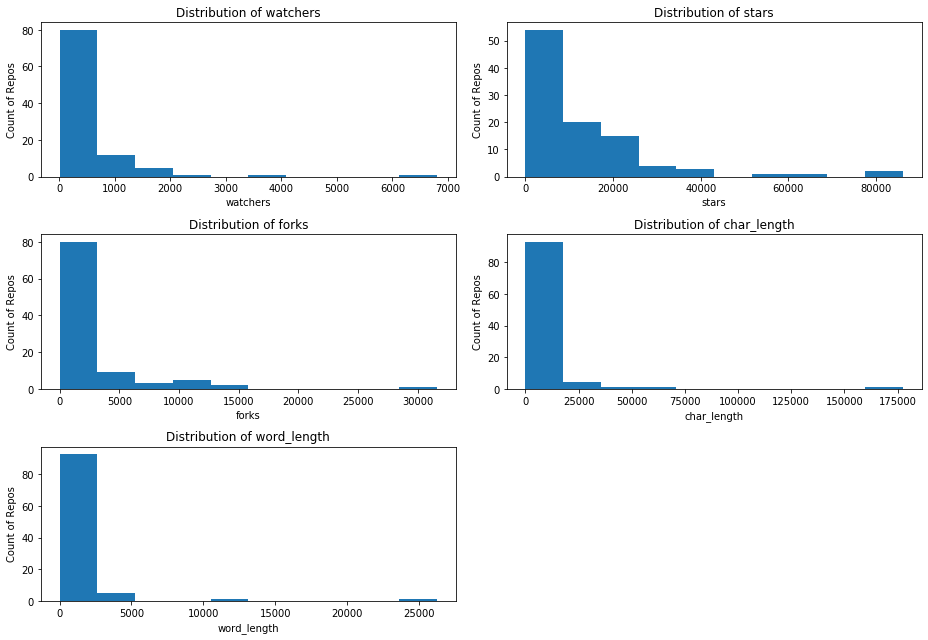

In [15]:
x = 1
plt.figure(figsize=(13,9))
for col in df.describe():
    
    plt.subplot(3,2,x)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count of Repos')
    plt.hist(df[col])
    x = x + 1
    
plt.tight_layout()

## Splitting the DF Into Train and Validate for Bivariate Analysis and Modeling
- Prepare Function Splits DF Into 68% Train, 32% Validate
    - 17 observations from each lanuage for Train
    - 8 observations from each language for Validate

In [16]:
train, validate = Prepare.train_validate(df)


train percent:  68.0 , validate percent:  32.0


In [17]:
train.language.value_counts()

java          18
javascript    18
python        16
swift         16
Name: language, dtype: int64

## Exploring Train DF Only
### Plotting Word Probability by Langauge

In [65]:
python_words = ' '.join(train[train.language == 'python'].filtered)
java_words = ' '.join(train[train.language == 'java'].filtered)
javascript_words = ' '.join(train[train.language == 'javascript'].filtered)
swift_words = ' '.join(train[train.language == 'swift'].filtered)
all_words = ' '.join(train.filtered)

In [66]:
python_words = re.sub(r'\s.\s', '', python_words)
java_words = re.sub(r'\s.\s', '', java_words)
javascript_words = re.sub(r'\s.\s', '', javascript_words)
swift_words = re.sub(r'\s.\s', '', swift_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [67]:
python_words_freq = pd.Series(python_words.split()).value_counts()
java_words_freq = pd.Series(java_words.split()).value_counts()
javascript_words_freq = pd.Series(javascript_words.split()).value_counts()
swift_words_freq = pd.Series(swift_words.split()).value_counts()
all_words_freq = pd.Series(all_words.split()).value_counts()

In [68]:
word_count = (pd.concat([all_words_freq, python_words_freq, java_words_freq, javascript_words_freq, swift_words_freq], axis=1, sort=True)
              .set_axis(['all','python', 'java', 'javascript', 'swift'], axis=1, inplace=False)
              .fillna(0).apply(lambda s: s.astype(int)))

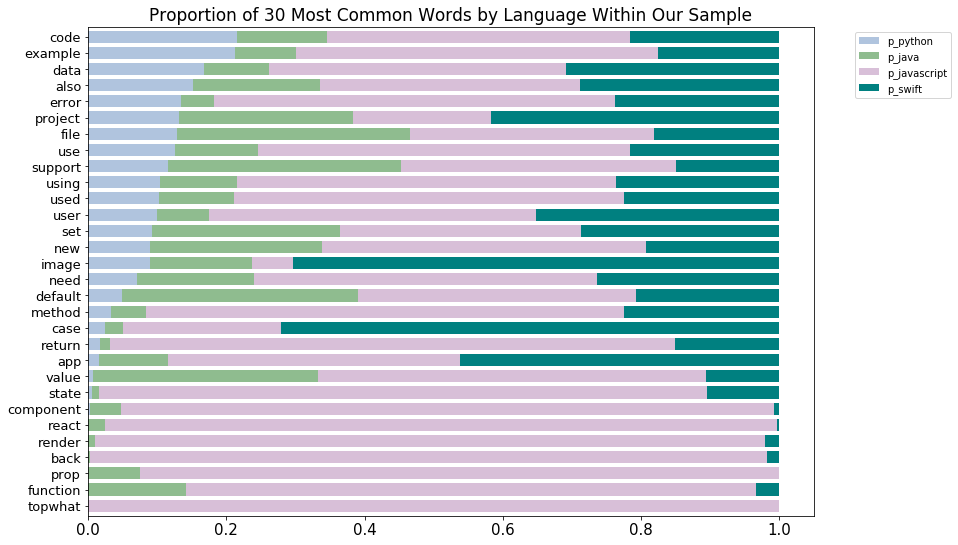

In [69]:
# lets plot the proportion of different languages amongst the top 50 occuring words

word_count.assign(p_python = word_count.python/word_count['all'],
                  p_java = word_count.java/word_count['all'],
                  p_javascript = word_count.javascript/word_count['all'],
                  p_swift = word_count.swift/word_count['all']).sort_values(by = 'all')[['p_python', 'p_java', 'p_javascript', 'p_swift']].tail(30).sort_values('p_python').plot.barh(width=.75,stacked = True, color={'darkseagreen','lightsteelblue','teal','thistle'}).legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.title('Proportion of 30 Most Common Words by Language Within Our Sample', size=17)
plt.yticks(size=13)
plt.xticks(size=15)
plt.show()

### Plotting Single Word Clouds by Language

In [70]:
# creating word cloud for all of the different programming languages
python_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(python_words)
java_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(java_words)
javascript_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(javascript_words)
swift_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(swift_words)

Text(0.5, 1.0, 'Swift Cloud')

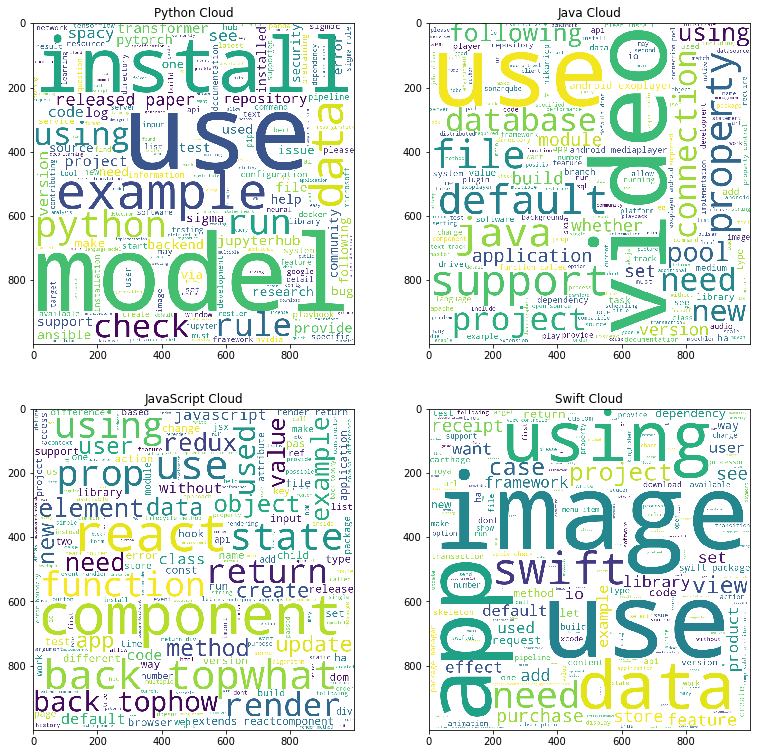

In [71]:
# plotting the word cloud
fig, axes = plt.subplots(2,2, figsize = (13,13))
axes[0,0].imshow(python_cloud)
axes[0,0].set_title('Python Cloud')
axes[0,1].imshow(java_cloud)
axes[0,1].set_title('Java Cloud')
axes[1,0].imshow(javascript_cloud)
axes[1,0].set_title('JavaScript Cloud')
axes[1,1].imshow(swift_cloud)
axes[1,1].set_title('Swift Cloud')

### Plotting Word Cloud of Complete Train

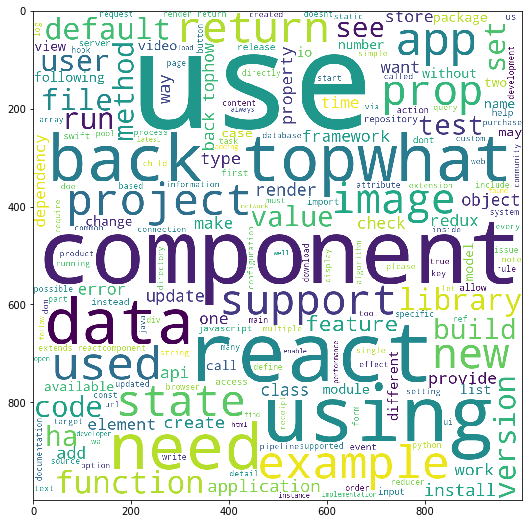

In [72]:
all_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(all_words)
plt.imshow(all_cloud)

### Plotting Frequency of Bigrams by Language

Text(0.5, 0, '# Occurances')

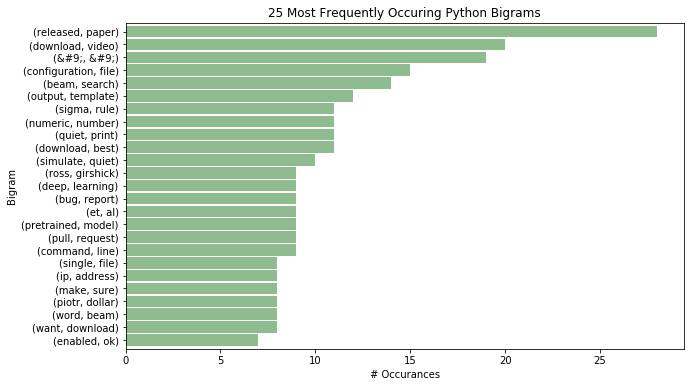

In [73]:
python_bigrams.sort_values().plot.barh(color='darkseagreen', width=.9, figsize=(10, 6))
    
plt.title('25 Most Frequently Occuring Python Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances') 

Text(0.5, 0, '# Occurances')

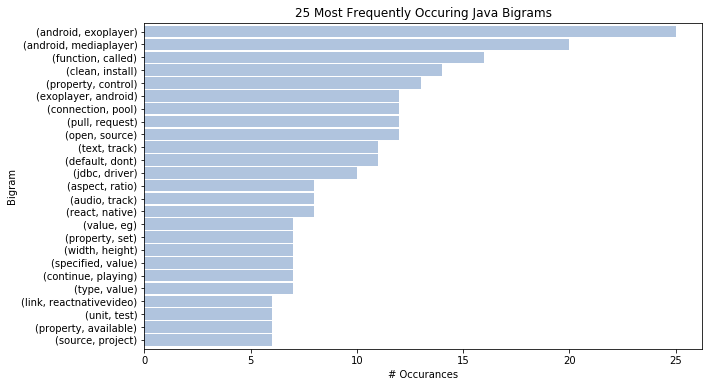

In [74]:
java_bigrams.sort_values().plot.barh(color='lightsteelblue', width=.9, figsize=(10, 6))
    
plt.title('25 Most Frequently Occuring Java Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances') 

Text(0.5, 0, '# Occurances')

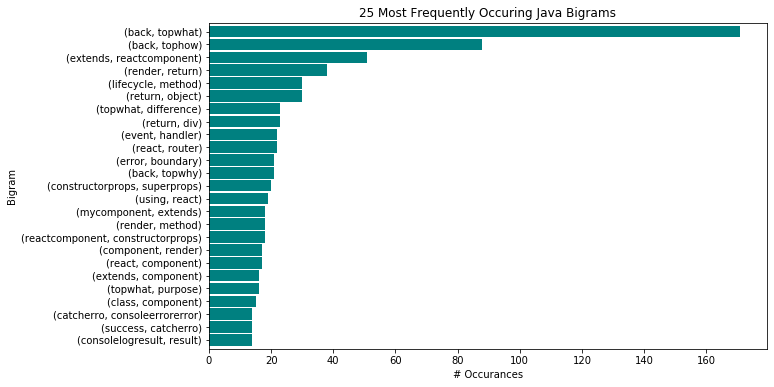

In [75]:
javascript_bigrams.sort_values().plot.barh(color='teal', width=.9, figsize=(10, 6))
    
plt.title('25 Most Frequently Occuring Java Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances') 

Text(0.5, 0, '# Occurances')

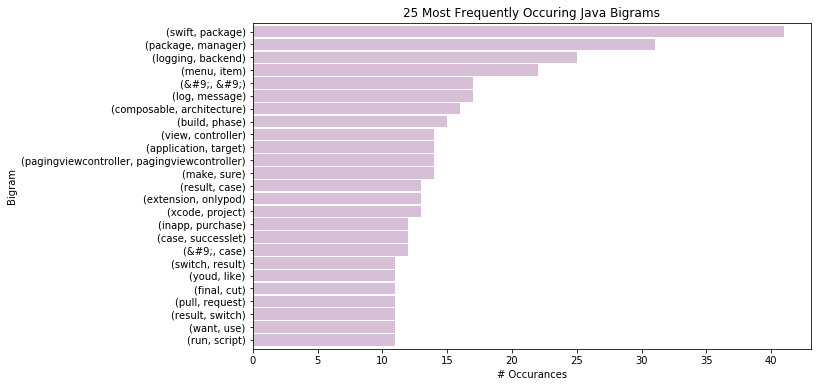

In [76]:
swift_bigrams.sort_values().plot.barh(color='thistle', width=.9, figsize=(10, 6))
    
plt.title('25 Most Frequently Occuring Java Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances') 

### Plotting Bi-gram Word Clouds by Language

In [77]:
python_bigrams = pd.Series(list(nltk.ngrams(python_words.split(), 2))).value_counts().head(25)
java_bigrams = pd.Series(list(nltk.ngrams(java_words.split(), 2))).value_counts().head(25)
javascript_bigrams = pd.Series(list(nltk.ngrams(javascript_words.split(), 2))).value_counts().head(25)
swift_bigrams = pd.Series(list(nltk.ngrams(swift_words.split(), 2))).value_counts().head(25)

In [78]:
python_data = {k[0] + ' ' + k[1]: v for k, v in python_bigrams.to_dict().items()}
java_data = {k[0] + ' ' + k[1]: v for k, v in java_bigrams.to_dict().items()}
javascript_data = {k[0] + ' ' + k[1]: v for k, v in javascript_bigrams.to_dict().items()}
swift_data = {k[0] + ' ' + k[1]: v for k, v in swift_bigrams.to_dict().items()}

In [79]:
# creating the bigram cloud
cloud_python = WordCloud(background_color = 'white', height = 1000, width = 1000)\
.generate_from_frequencies(python_data)

cloud_java = WordCloud(background_color = 'white', height = 1000, width = 1000).\
generate_from_frequencies(java_data)

cloud_javascript = WordCloud(background_color = 'white', height = 1000, width = 1000).\
generate_from_frequencies(javascript_data)

cloud_swift = WordCloud(background_color = 'white', height = 1000, width = 1000).\
generate_from_frequencies(swift_data)

Text(0.5, 1.0, 'Swift Cloud Bigrams')

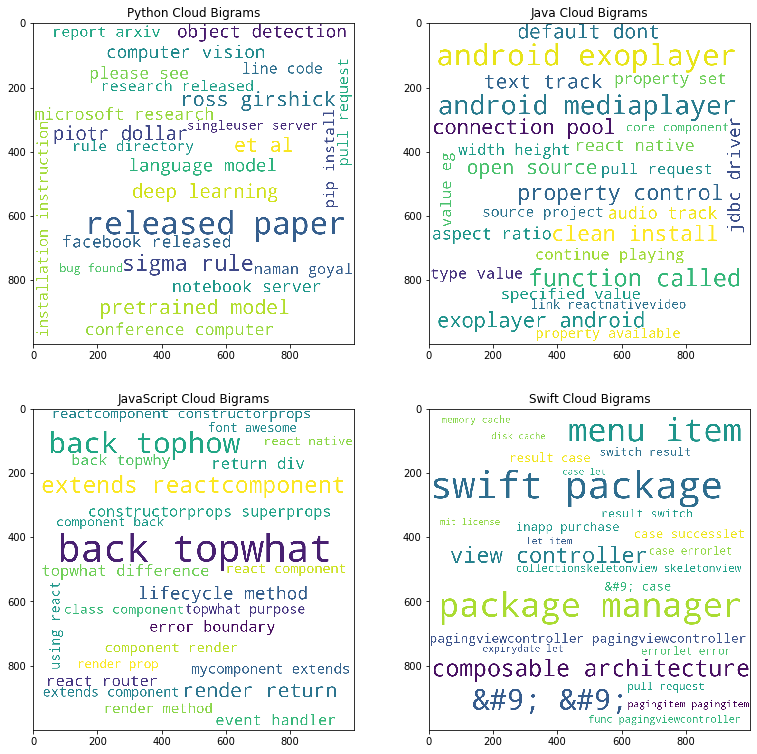

In [80]:
# plotting the bigram word cloud
fig, axes = plt.subplots(2,2, figsize = (13,13))
axes[0,0].imshow(cloud_python)
axes[0,0].set_title('Python Cloud Bigrams')
axes[0,1].imshow(cloud_java)
axes[0,1].set_title('Java Cloud Bigrams')
axes[1,0].imshow(cloud_javascript)
axes[1,0].set_title('JavaScript Cloud Bigrams')
axes[1,1].imshow(cloud_swift)
axes[1,1].set_title('Swift Cloud Bigrams')

### Do any features correlate with Word_Length?
- not including word_length and char_length, which are derived from the same feature
- what if we control for language?

Text(0.5, 1, 'Correlation Heatmap for All Observations')

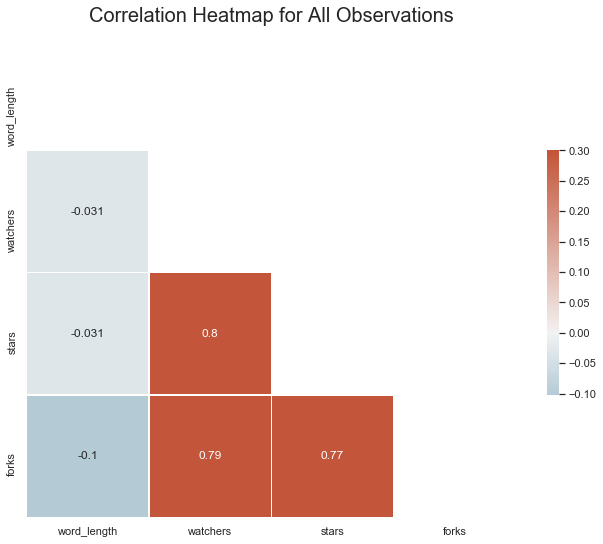

In [126]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = (train[['language','word_length','watchers','stars','forks']].corr())

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap for All Observations', size = 20)

### Heatmap by Language

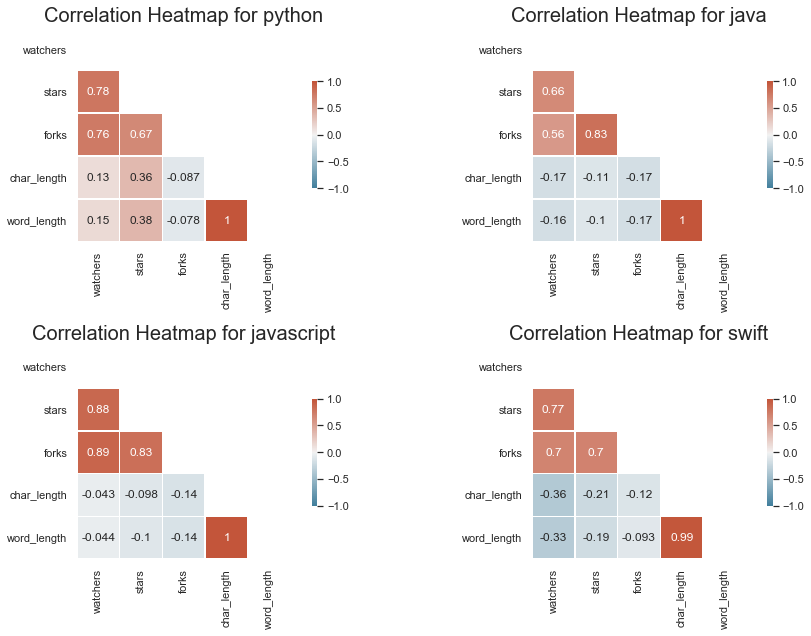

In [139]:
sns.set_theme(style="white")

y = 1

for x in ['python','java','javascript','swift']:
    
    plt.subplot(2,2,y)
    
    # Compute the correlation matrix
    corr = (train[train[['language','word_length','watchers','stars','forks']].language == x].corr())

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title(f'Correlation Heatmap for {x}', size = 20)
    
    y+=1
    
plt.tight_layout()

### Exploring Document Length by Language

Text(0.5, 1.0, 'Distribution of Word Length by Language')

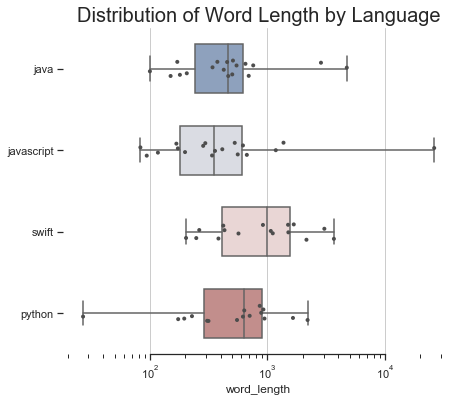

In [91]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="word_length", y="language", data=train,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="word_length", y="language", data=train,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.title('Distribution of Word Length by Language', size=20)

### Do Stars, Watchers, and Forks Significantly Vary by Language?

<Figure size 2160x1080 with 0 Axes>

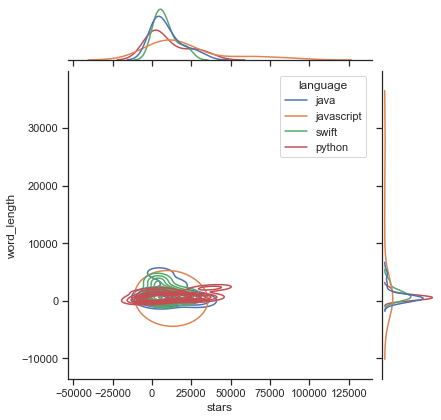

In [143]:
sns.set_theme(style="ticks")

plt.figure(figsize=(30,15))

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=train,
    x="stars", y="word_length", hue="language",
    kind="kde",
)


<Figure size 2160x1080 with 0 Axes>

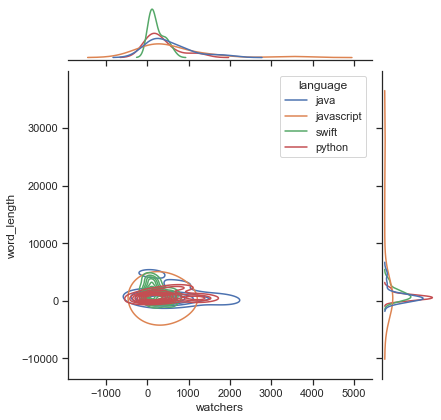

In [121]:
sns.set_theme(style="ticks")

plt.figure(figsize=(30,15))

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=train,
    x="watchers", y="word_length", hue="language",
    kind="kde",
)

<Figure size 2160x1080 with 0 Axes>

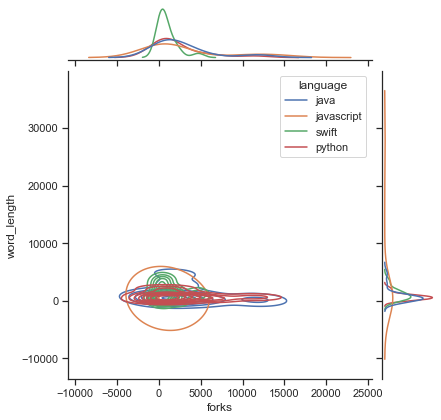

In [122]:
sns.set_theme(style="ticks")

plt.figure(figsize=(30,15))

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=train,
    x="forks", y="word_length", hue="language",
    kind="kde",
)

### Takeaways
Conclusions:  
Next Steps:

##### [Back to Top](#top)

# Modeling <a class="anchor" id="fourth-bullet"></a>

In [161]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## Bag of Words

In [146]:
vectorizer = CountVectorizer(stop_words='english', 
                             min_df=10, 
                             ngram_range=(1,2), 
                             binary=True)


vectorizer.fit(train.filtered)

vectorizer.get_feature_names()

bow = vectorizer.transform(train.filtered)
bow

<68x289 sparse matrix of type '<class 'numpy.int64'>'
	with 4801 stored elements in Compressed Sparse Row format>

In [147]:
bow_array = bow.toarray()
bow_array[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [148]:
# Show sentences and vector space representation.
#  to visualize what's happening.
for i, v in zip(train.filtered, bow_array):
    print(i)
    print(v)

dolphin scheduler official websitedolphinschedulerapacheorgdolphin scheduler big datadesign featuresa distributed easytoextend visual dag workflow scheduling system dedicated solving complex dependency data processing making scheduling system box data processingits main objective followsassociate task according dependency task dag graph visualize running state task real timesupport many task type shell mr spark sql mysql postgresql hive sparksql python subprocess procedure etcsupport process scheduling dependency scheduling manual scheduling manual pausestoprecovery support failed retryalarm recovery specified node kill task etcsupport process priority task priority task failover task timeout alarmfailuresupport process global parameter node custom parameter settingssupport online uploaddownload resource file management etc support online file creation editingsupport task log online viewing scrolling online download log etcimplement cluster ha decentralize master cluster worker cluster

In [149]:
X_bow = bow

In [151]:
tfidf = TfidfVectorizer(stop_words='english', min_df=10, 
                             ngram_range=(1,2), 
                             binary=True)

tfidf_sparse_matrix = tfidf.fit_transform(train.filtered)
tfidf_sparse_matrix

<68x289 sparse matrix of type '<class 'numpy.float64'>'
	with 4801 stored elements in Compressed Sparse Row format>

In [152]:
pd.DataFrame(tfidf_sparse_matrix.todense(), columns=tfidf.get_feature_names())

,20,access,action,add,adding,additional,allow,allows,apache,api,...,way,web,website,welcome,window,work,write,written,xcode,youre
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.147171,0.120488,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.107806,0.000000,0.0,0.000000,0.134293,0.000000,0.000000,...,0.116920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.109268,0.000000,0.109268,0.078537,0.000000,0.0,0.000000,0.000000,0.000000,0.080096,...,0.085177,0.000000,0.112726,0.000000,0.000000,0.075592,0.000000,0.000000,0.106087,0.000000
3,0.000000,0.000000,0.087139,0.062632,0.080066,0.0,0.000000,0.000000,0.000000,0.063875,...,0.067927,0.000000,0.000000,0.089897,0.000000,0.060283,0.000000,0.089897,0.084602,0.080066
4,0.000000,0.000000,0.000000,0.000000,0.143340,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.107923,0.000000,0.000000,0.151461,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.000000,0.000000,0.000000,0.134856,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.182161,0.129798,0.000000,0.000000,0.000000,0.000000
64,0.000000,0.000000,0.000000,0.082581,0.105569,0.0,0.000000,0.000000,0.102871,0.000000,...,0.089563,0.000000,0.000000,0.000000,0.111549,0.079484,0.118530,0.000000,0.111549,0.000000
65,0.102207,0.091512,0.000000,0.000000,0.000000,0.0,0.000000,0.091512,0.000000,0.000000,...,0.079672,0.093911,0.000000,0.105442,0.099231,0.070707,0.105442,0.000000,0.000000,0.000000
66,0.000000,0.000000,0.000000,0.166088,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.238390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [154]:
# Get vocabularies.
tfidf.vocabulary_

{'dependency': 62,
 'data': 59,
 'making': 151,
 'main': 148,
 'running': 223,
 'type': 264,
 'python': 200,
 'process': 189,
 'support': 250,
 'specified': 242,
 'custom': 58,
 'resource': 216,
 'file': 86,
 'management': 152,
 'log': 144,
 'download': 74,
 'ha': 103,
 'load': 142,
 'information': 113,
 'time': 260,
 'supported': 251,
 'source': 240,
 'api': 9,
 'mode': 158,
 'user': 272,
 'large': 129,
 'number': 170,
 'single': 237,
 'platform': 186,
 'currently': 57,
 'including': 111,
 'feature': 85,
 'contributing': 48,
 'refer': 205,
 'clean': 32,
 'install': 115,
 'binary': 20,
 'package': 178,
 'code': 35,
 'lot': 146,
 'open': 172,
 'project': 191,
 'google': 99,
 'apache': 8,
 'possible': 188,
 'software': 238,
 'used': 271,
 'contributor': 50,
 'contribute': 47,
 'list': 140,
 'send': 228,
 'channel': 29,
 'license': 136,
 'open source': 173,
 'version': 275,
 'release': 207,
 'note': 168,
 'remove': 209,
 'connection': 44,
 'following': 89,
 'change': 28,
 'better': 19,
 '

In [155]:
# Transform to document-term matrix
vector_spaces = tfidf.transform(train.filtered)
vector_spaces.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10926789, 0.        , 0.10926789, ..., 0.        , 0.10608657,
        0.        ],
       ...,
       [0.10220675, 0.09151162, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.1866862 , 0.        ,
        0.        ]])

In [156]:
# Show sentences and vector space representation.
# 
# (A, B) C
# A : Document Index
# B : Specific word-vector index
# C : TF-IDF score
for i, v in zip(train.filtered, vector_spaces):
    print(i)
    print(v)

dolphin scheduler official websitedolphinschedulerapacheorgdolphin scheduler big datadesign featuresa distributed easytoextend visual dag workflow scheduling system dedicated solving complex dependency data processing making scheduling system box data processingits main objective followsassociate task according dependency task dag graph visualize running state task real timesupport many task type shell mr spark sql mysql postgresql hive sparksql python subprocess procedure etcsupport process scheduling dependency scheduling manual scheduling manual pausestoprecovery support failed retryalarm recovery specified node kill task etcsupport process priority task priority task failover task timeout alarmfailuresupport process global parameter node custom parameter settingssupport online uploaddownload resource file management etc support online file creation editingsupport task log online viewing scrolling online download log etcimplement cluster ha decentralize master cluster worker cluster

In [157]:
X_tfidf = tfidf_sparse_matrix

In [158]:
y = train['language']

X_bow
X_tfidf

<68x289 sparse matrix of type '<class 'numpy.float64'>'
	with 4801 stored elements in Compressed Sparse Row format>

In [160]:
# modeling with bag of words

lm = LogisticRegression().fit(X_bow, y)

train['predicted'] = lm.predict(X_bow)
# test['predicted'] = lm.predict(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [162]:
confusion_matrix(train.language, train.predicted)

array([[18,  0,  0,  0],
       [ 0, 18,  0,  0],
       [ 0,  0, 16,  0],
       [ 0,  0,  0, 16]])

In [163]:
pd.crosstab(train.language, train.predicted)

predicted,java,javascript,python,swift
language,,,,
java,18,0,0,0
javascript,0,18,0,0
python,0,0,16,0
swift,0,0,0,16


In [164]:
print(classification_report(train.language, train.predicted))

              precision    recall  f1-score   support

        java       1.00      1.00      1.00        18
  javascript       1.00      1.00      1.00        18
      python       1.00      1.00      1.00        16
       swift       1.00      1.00      1.00        16

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



## TF_iDF

In [165]:
lm_tfidf = LogisticRegression().fit(X_tfidf, y)
train['pred_tfidf'] = lm_tfidf.predict(X_tfidf)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [166]:
pd.crosstab(train.language, train.pred_tfidf)

pred_tfidf,java,javascript,python,swift
language,,,,
java,18,0,0,0
javascript,0,17,0,1
python,0,0,16,0
swift,0,0,0,16


In [167]:
print(classification_report(train.language, train.pred_tfidf))

              precision    recall  f1-score   support

        java       1.00      1.00      1.00        18
  javascript       1.00      0.94      0.97        18
      python       1.00      1.00      1.00        16
       swift       0.94      1.00      0.97        16

    accuracy                           0.99        68
   macro avg       0.99      0.99      0.99        68
weighted avg       0.99      0.99      0.99        68



### Takeaways
Conclusions:  
Next Steps:

##### [Back to Top](#top)

# Final Conclusions <a class="anchor" id="fifth-bullet"></a>

##### [Back to Top](#top)